# Формулы

Для вывода формул используется система компьютерной верстки LaTEX, а точнее JS реализация модлуля отвечающего за вывод формул MathJax.

$f(x) = \frac{1}{(x_n)^2}$

Можно вставлять формулы прямо в тексте, вот так: $\sqrt{3x-1}+(1+x)^2$, выражение описывающее формулу обрамляется '$'

Или формула может быть расположена на отедльной строке:
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i\tag{1}$$

Совсем сложные формулы можно оформлять также как в LaTEX

\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

# Графики (matplotlib)
Для построения графиков, от обычных до гистограм и трехмерных, используют библиотеку matplotlib.

In [25]:
# импортируем модуль matplotlib, вернее его часть, позволяющую быстро строить графики
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# импортируем модуль numpy, он поможет задать числовой ряд 
import numpy as np

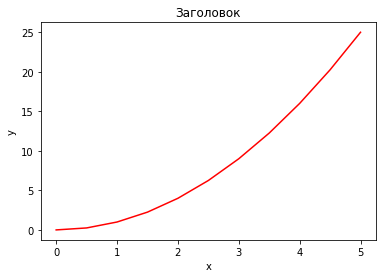

In [3]:
x = np.linspace(0, 5, 11)
y = x ** 2

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Заголовок')
plt.show()


## Дополнительные возможности
Можно построить несколько графиков в одном.
Можно линии обозначать разными цветами, пунктирами, символами.
Можно использовать формулы LaTEX в подписях.

Text(0.5, 1.0, '$f(x)=\\sqrt{x}$')

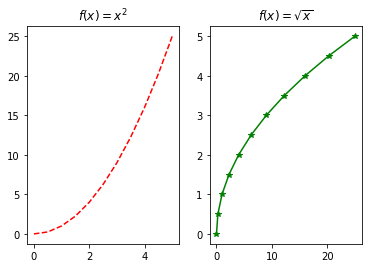

In [9]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.title("$f(x)=x^2$")
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-')
plt.title("$f(x)=\sqrt{x}$")

Можно изменять маштаб графика.
Можно встраивать график в другой график.
Можно сохранять в файл.
В том числе и в векторном формате.

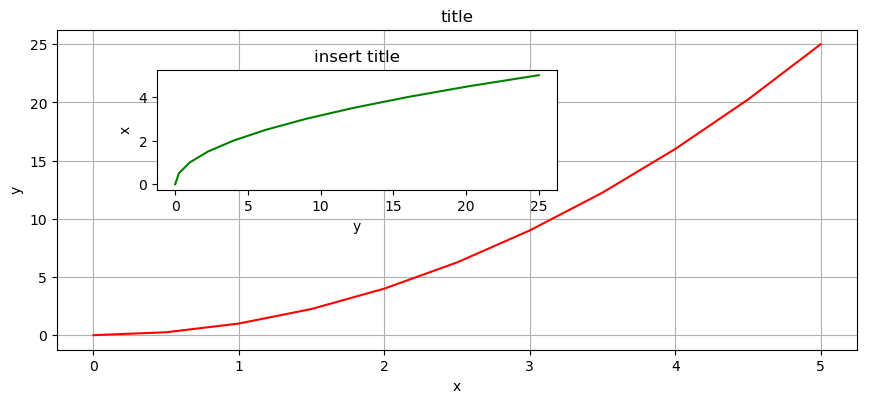

In [18]:
fig = plt.figure(figsize=(10,4), dpi=100)

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # главные оси
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # оси внутреннего графика

# главный график
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')
axes1.grid(True)

# внутренний график
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')


plt.savefig("plot.png")
plt.savefig("plot.svg")

Можно представлять графики в других разных видах.

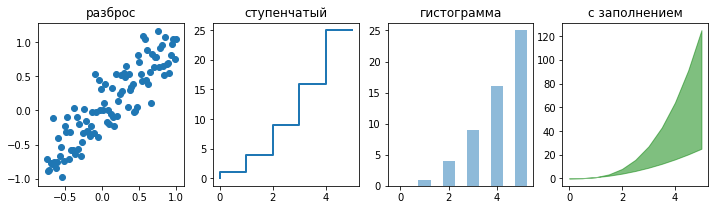

In [21]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("разброс")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("ступенчатый")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("гистограмма")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("с заполнением");

Можно строить "тепловые карты".

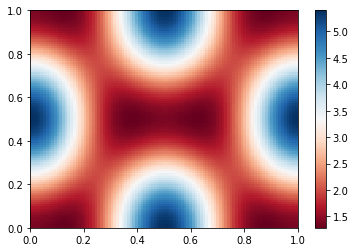

In [26]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

Можно строить контуры, для, к примеру, изображения электрического поля.

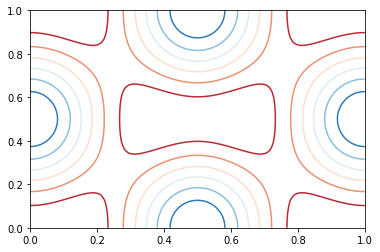

In [27]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

Можно строить трехмерные графики в ассортименте.

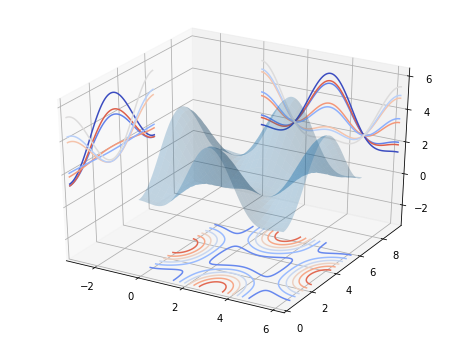

In [29]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);